# A binary classification Neural Network #

Purpose of this notebook :

- create a binary classification neural network from scratch
- practice oop programming
- practice docstring and commentaries

In [1]:
# Add useful librairies

import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# First the full neural network

# The prupose is to predict from data
# let's create some data a XOR problematic

# Let's fix ou random seed
np.random.seed(42)

# A dataset of m example with 2 inputs shape(2 m)
X = np.random.randn(2, 100)
# Transorm inputs in O. or 1.
X = (X > 0.5) * 1.

# The labels (when x = (0 0) or (1 1) > False, x = (0 1) or (1 0) > True)
Y = (np.sum(X, axis=0, keepdims=True) == 1) * 1.

print('X : \n', X[:,:5])
print('Y : \n', Y[:,:5])

X : 
 [[0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0.]]
Y : 
 [[0. 0. 1. 1. 0.]]


In [3]:
# Coding the sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# testons la sigmoid
sigmoid(0)

0.5

0.6759343996579917
0.19232834621526615
0.1917416981014084
0.1913640541323848
0.191238571863169
0.19118329393667807
0.19115133556055056
0.19113051854714003
0.1911159050893599
0.19110509690299246


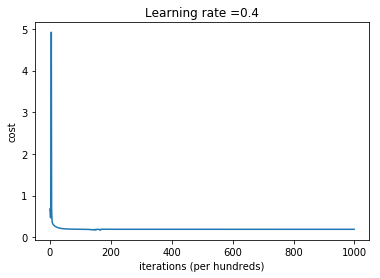

93.0


In [4]:
# let's concatenate all our cells

# parameters
np.random.seed(42)
hidden_layers = [7,2]
iteration = 1000
learning_rate = 0.4

layers = [X.shape[0]] + hidden_layers + [1]
# we need a list to store our costs
costs = []

# Initialisation of list Weights and bias shape (output_layer(-1) layer) (output_layer(-1) 1)
W = [np.random.randn(layers[k], layers[k-1]) for k in range(1, len(layers))]
b = [np.zeros((layers[k], 1)) for k in range(1, len(layers))]

# training loop
for k in range(iteration):
    # Forward -------------------------------------------------
    # Let's make a list of activation starting with the inputs matrix
    activation = [X]
    # Loop to pass through all neurons
    for l in range(len(layers)-1):
    #     print(activation[l],' * ',W[l],' + ',b)
        pre_activation = np.dot(W[l], activation[l]) + b[l]
    #     print('preactivation :',pre_activation)
        activation.append(sigmoid(pre_activation))

    # loss and cost ----------------------------------
    prediction_inter = activation[-1]
    # loss function
    loss = -Y * np.log(prediction_inter) - (1 - Y) * np.log(1 - prediction_inter)
    # number of examples
    m = X.shape[1]
    # Cost function
    cost = np.sum(loss) / m
    if k % 100 == 0:
        print(cost)
    # Cost storage
    costs.append(cost)

    # Backward --------------------------------------------------

    # First the last layer
    d_loss = -Y/activation[-1] + (1-Y)/(1-activation[-1])
    d_activation = activation[-1] * (1 - activation[-1])
    d_pre_activation = d_loss * d_activation

    d_W = [np.dot(d_pre_activation, activation[-2].T)]
    d_b = [np.sum(d_pre_activation, axis=1, keepdims=True) / m]

    # Loop for the next layers
    for l in reversed(range(1, len(layers)-1)):
        d_pre_activation = np.dot(W[l].T, d_pre_activation)
        d_pre_activation_sig = d_pre_activation * activation[l] * (1 - activation[l])

        d_W.insert(0, np.dot(d_pre_activation_sig, activation[l-1].T))
        d_b.insert(0, np.sum(d_pre_activation_sig, axis=1, keepdims=True) / m)

    # updating the parameters
    # Loop for updating all weights and bias in the network
    for i in range(len(layers)-1):
        W[i] -= learning_rate * d_W[i]
        b[i] -= learning_rate * d_b[i]

# Let's show the loss evolution
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()
        
        
# Let's compute the accuracy
prediction = (activation[-1] > 0.5) * 1
accuracy = (1 - np.mean(np.abs(Y - prediction))) * 100
print(accuracy)